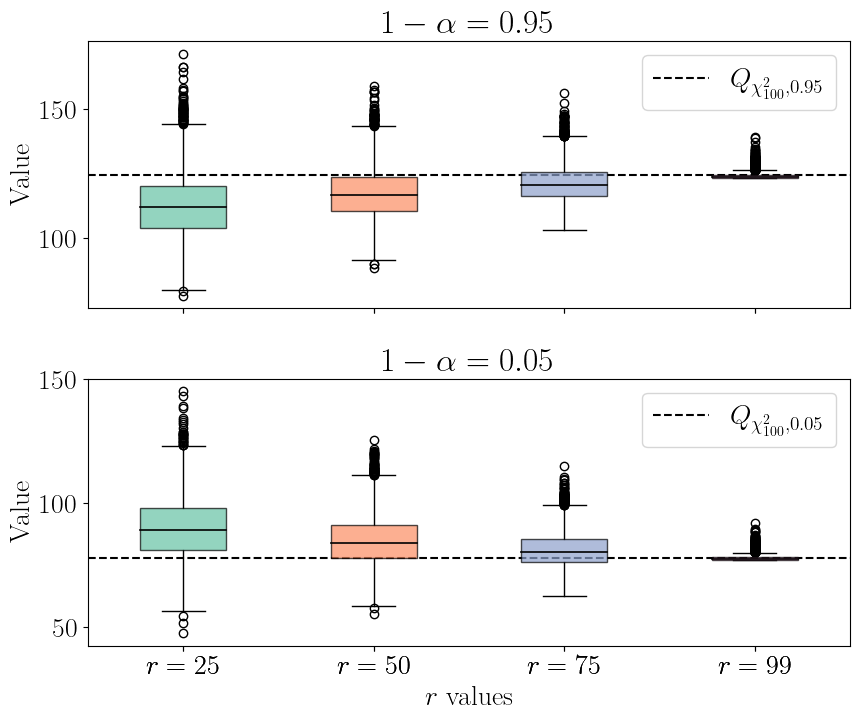

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import matplotlib.patches as mpatches
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
plt.rcParams.update({'font.size': 20})


# Parameters
n = 100
r_values = [25, 50, 75, 99]  # avoid r=100
alphas = [0.05, 0.95]  # corresponds to 1-alpha = 0.95, 0.25
n_samples = 5000

# Colors for boxplots
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]

fig, axes = plt.subplots(len(alphas), 1, figsize=(9, 8), sharex=True)

for ax, alpha in zip(axes, alphas):
    one_minus_alpha = 1 - alpha
    
    # Constant reference quantile
    q_const = chi2.ppf(one_minus_alpha, df=n)
    ax.axhline(q_const, color="black", linestyle="--", linewidth=1.5,
               label=f"$Q_{{\\chi^2_{{100}},{np.round(one_minus_alpha,2)}}}$")
    
    box_data = []
    labels = []
    
    for r in r_values:
        # Random distribution: Q_{chi^2_r}(1-alpha) + xi_{n,r}, xi ~ chi2_{n-r}
        q_r = chi2.ppf(one_minus_alpha, df=r)
        xi = chi2.rvs(df=n-r, size=n_samples)
        values = q_r + xi
        
        box_data.append(values)
        labels.append(f"$r={r}$")
    
    # Create boxplot
    bp = ax.boxplot(
        box_data,
        labels=labels,
        patch_artist=True,
    )
    
    # Color boxes
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Style whiskers, caps, medians
    for median in bp["medians"]:
        median.set(color="black", linewidth=1.2)
    for whisker in bp["whiskers"]:
        whisker.set(color="black", linewidth=1.0)
    for cap in bp["caps"]:
        cap.set(color="black", linewidth=1.0)
    
    ax.set_title(f"$1-\\alpha = {np.round(one_minus_alpha,2)}$")
    ax.set_ylabel("Value")
    ax.legend()

plt.xlabel("$r$ values")
#plt.suptitle("Comparison of fixed $Q_{\\chi^2_n}$ vs. random $Q_{\\chi^2_r}+\\xi_{n,r}$",
#             fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("quantile_comparison.pdf", bbox_inches="tight")
plt.show()

